# Georcoronal Correction


In [4]:
# import
%matplotlib inline
import os,sys
import matplotlib
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import csv
import pandas as pd
import sfdmap
import extinction
from astropy import units as u
import math
import pylatex

# pyqsofit
from scipy import interpolate

# for SDSS SQL queries
import mechanize
from io import BytesIO

import glob,timeit

#sys.path.append('/Users/runnojc1/Software/py/pyspeckit')
import pyspeckit
from pyspeckit.spectrum.models.inherited_gaussfitter import gaussian
from pyspeckit.specwarnings import PyspeckitWarning
from astropy.table import Table

## Data

In [11]:
file_path = 'ascii/J14301603+2303445_2023-01-06_COS.dat'

t = Table.read(file_path, format='ascii', delimiter='\s', header_start=3, data_start=5)

column_names = ['Wavelength', 'F_lambda', 'e_F_lambda']

original_colnames = t.colnames

for original, new in zip(original_colnames, column_names):
    t.rename_column(original, new)
    
t.sort('Wavelength')

In [8]:
## Reading table to get the table header
file_path = 'HET/combined_spectrum_20230113_0000022_exp01.fits'

with fits.open(file_path) as hdulist:
    hdulist.info()
    hdu_header = hdulist[0].header
    print("HDU Header:")
    print(repr(hdu_header))
    


Filename: HET/combined_spectrum_20230113_0000022_exp01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     18   8256R x 5C   [D, D, D, D, D]   
HDU Header:
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  


## Find the width of the lines in pixels and Angstroms.


## Projected Aperture Calculation

### Given Data
- **Aperture PSA width:** 0.2 arcseconds
- **COS Platescale:** 23.0 milliarcseconds/pixel = 0.023 arcseconds/pixel
- **Grating G140L Average Dispersion:** 0.6 Angstroms/pixel
- **Central Wavelength:** 800 Angstrom
- 

### Calculation
1. **Calculate the projected aperture width in pixels:**

   $$
   \text{Projected aperture width (pixels)} = \frac{0.2 \text{ arcseconds}}{0.023 \text{ arcseconds per pixel}} = 8.7 \text{ pixels}
   $$

2. **Calculate the projected aperture width in Angstroms:**

   $$
   \text{Projected aperture width (Angstroms)} = 8.7 \text{ pixels} \times 0.6 \text{ Angstroms per pixel} = 5.22 \text{ Angstroms}
   $$



## Creating box profile in spctrum

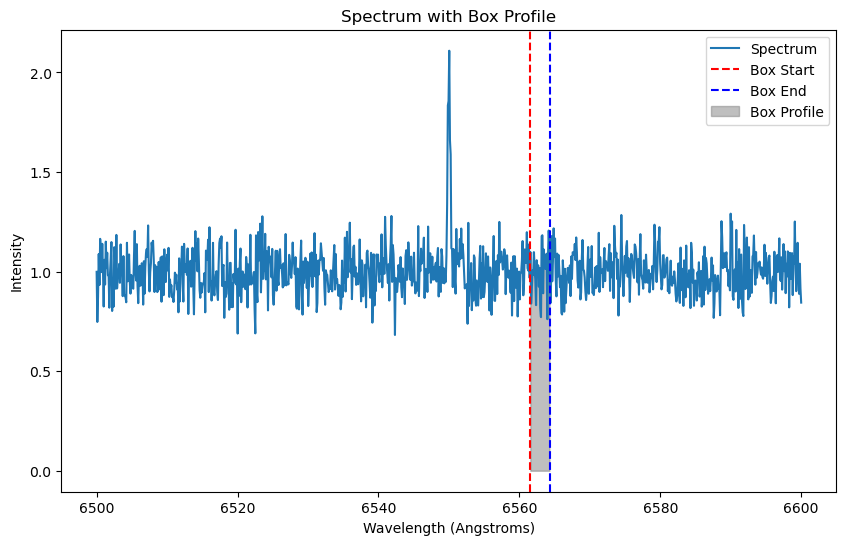

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Example spectrum data (replace with your actual data)
wavelengths = np.linspace(6500, 6600, 1000)  # Example wavelength range from 6500 to 6600 Angstroms
spectrum = np.random.normal(1, 0.1, size=1000)  # Example spectrum with noise
spectrum[490:510] += np.exp(-0.5 * ((np.linspace(0, 1, 20) - 0.5) / 0.1) ** 2)  # Add a Gaussian peak at 6563 Angstroms

# Example parameters
central_wavelength = 6563  # Hα line
line_width_angstroms = 3
dispersion_angstroms_per_pixel = (wavelengths[1] - wavelengths[0])  # Calculate from the wavelength array

# Calculate the box dimensions
box_width_pixels = int(line_width_angstroms / dispersion_angstroms_per_pixel)
central_pixel_position = np.argmin(np.abs(wavelengths - central_wavelength))

# Define the box coordinates
x_start = central_pixel_position - box_width_pixels // 2
x_end = central_pixel_position + box_width_pixels // 2

# Plot the spectrum with the box profile
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, spectrum, label='Spectrum')
plt.axvline(wavelengths[x_start], color='r', linestyle='--', label='Box Start')
plt.axvline(wavelengths[x_end], color='b', linestyle='--', label='Box End')
plt.fill_between(wavelengths[x_start:x_end], spectrum[x_start:x_end], color='grey', alpha=0.5, label='Box Profile')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Intensity')
plt.title('Spectrum with Box Profile')
plt.legend()
plt.show()
